In [1]:
import numpy as np
import pandas 
import scipy
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import os
import os.path 
from pathlib import Path
%matplotlib inline

from definitions import ROOT_DIR


In [2]:
print(os.getcwd())
vel_before_common = []
vel_after_common = []

C:\Users\panf\Documents\nanobio\laser


# vel - функция, которой на вход подается трэйс и шаг, внутри нее делится на два участка, до старта и после, на выход выдвютс распределения скоростей


In [3]:
def vel (trace, step): 
    N = len(trace)
    velocity_before = []
    velocity_after = []
    time_for_velocity = [trace["time"].iloc[i + step] for i in range (0, N-step)]
    for i in range (0, N-step):
        dlength = trace["median"].iloc[i + step] - trace["median"].iloc[i]
        dtime = trace["time"].iloc[i + step] - trace["time"].iloc[i] 
        if trace["time"].iloc[i+step] < 0 and trace["time"].iloc[i] >= -30 :
            velocity_before.append (dlength / dtime)

        if trace["time"].iloc[i] >= 0 and trace["time"].iloc[i] <30  :
            velocity_after.append (dlength / dtime)
     
    return(velocity_before, velocity_after)    




C:\Users\panf\Documents\nanobio\laser\n17dc4.txt
n17dc4.txt
Choose the window of median filter:300
          time   length
0     -240.000    0.000
1     -239.976  -25.909
2     -239.964  -14.234
3     -239.928  -24.578
4     -239.910   27.759
...        ...      ...
26341  419.898 -458.324
26342  419.916 -427.421
26343  419.940 -382.080
26344  419.964 -379.418
26345  419.988 -364.191

[26346 rows x 2 columns]
here1


<ipython-input-4-1f9c0c26273f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace ["savgol"] = savgol_filter((trace.iloc[:, 2]),65, 3, mode='interp' )


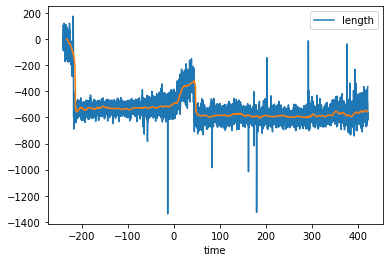

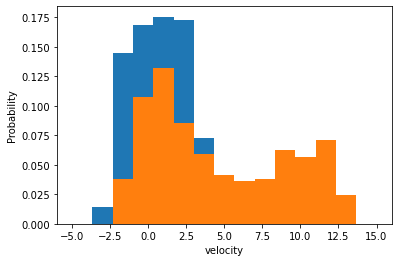

Do you want to process this trace once more(if yes print y):n
C:\Users\panf\Documents\nanobio\laser\n1dc4.txt
n1dc4.txt
Choose the window of median filter:300
          time   length
0     -239.976    0.000
1     -239.952  -18.961
2     -239.940  -13.393
3     -239.904   -6.277
4     -239.886   -9.844
...        ...      ...
26237  419.922   93.560
26238  419.940   86.788
26239  419.964   73.378
26240  419.988  174.489
26241  420.012  174.360

[26242 rows x 2 columns]
here1


<ipython-input-4-1f9c0c26273f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace ["savgol"] = savgol_filter((trace.iloc[:, 2]),65, 3, mode='interp' )


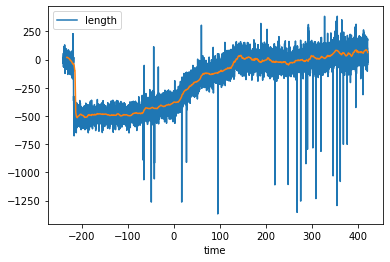

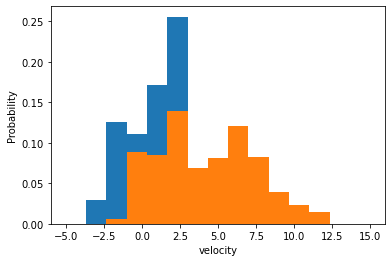

Do you want to process this trace once more(if yes print y):n


In [4]:
for current_dir,dirs, files in os.walk(ROOT_DIR) :
    for el in files: 
        if el.endswith(".txt") :
            full_path = Path(current_dir) / el
            print(full_path)
            trace = pandas.read_table(full_path,  decimal=',')  
            trace.plot(x="time", y=["length"])
            
            flag = True
            while flag:
                print(el)
                window = int(input("Choose the window of median filter:")) # окно медианного фильтра 
                #treshold = int(input("Choose the period of processing:" )) # сколько секунд до и после берем в обработку 
                #start_point = int(input("Choose the start_point:" ))            
                print(trace)
                
                trace["median"]= trace["length"].rolling(window).median()
                trace["std"] = trace["length"].rolling(window).std()

              
                trace = trace[(trace.length <= trace['median']+3*trace['std']) & (trace.length >= trace['median']-3*trace['std'])]
                trace ["savgol"] = savgol_filter((trace.iloc[:, 2]),65, 3, mode='interp' )

                
                trace = trace[(trace.length <= trace['median']+3*trace['std']) & (trace.length >= trace['median']-3*trace['std'])]
                trace ["savgol"] = savgol_filter((trace.iloc[:, 2]),65, 3, mode='interp' )

                print("here1")

                step = 125 

                plt.plot(trace["time"], trace['savgol'] )
                plt.show()



                velocity_before, velocity_after = vel (trace, step)
                #print(velocity_before)
                #print(velocity_after)
                
                vel_before_common = vel_before_common + velocity_before
                vel_after_common = vel_after_common + velocity_after
                
                
                plt.hist(velocity_before, density=True, bins=15, range = (-5,15))  # density=False would make counts
                plt.ylabel('Probability')
                plt.xlabel('velocity');
                
                plt.hist(velocity_after, density=True, bins=15, range = (-5,15))  # density=False would make counts
                plt.ylabel('Probability')
                plt.xlabel('velocity'); 
                plt.show()
                
               
                exit = input("Do you want to process this trace once more(if yes print y):")
                if exit != 'y':
                    flag = False
                    vel_before_common = vel_before_common + velocity_before
                    vel_after_common = vel_after_common + velocity_after
            

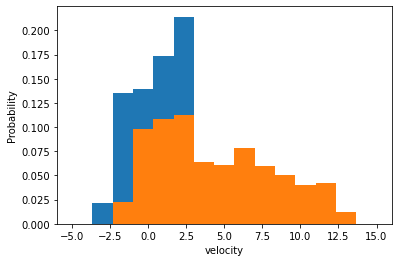

In [6]:
                plt.hist(vel_before_common, density=True, bins=15, range = (-5,15))  # density=False would make counts
                plt.ylabel('Probability')
                plt.xlabel('velocity');
                
                plt.hist(vel_after_common, density=True, bins=15, range = (-5,15))  # density=False would make counts
                plt.ylabel('Probability')
                plt.xlabel('velocity'); 
                plt.show()
                